In [2]:
import open3d as o3d
import numpy as np
import SimpleITK as sitk
from skimage import measure
import matplotlib.pyplot as plt
import nibabel as nib

def npy_to_voxel_grid(npy_file, voxel_size=1.0):
    # Load the .npy file
    volume = np.load(npy_file)
    
    # Create a PointCloud from the non-zero voxels
    points = np.argwhere(volume > 0.5)  # Get the indices of non-zero elements
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(points)

    # Assign colors (uniform color in this case)
    colors = np.tile([1, 0, 0], (len(points), 1))  # Repeat the color for each point
    point_cloud.colors = o3d.utility.Vector3dVector(colors)

    # Use create_from_point_cloud_within_bounds to generate a VoxelGrid
    voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud_within_bounds(
        point_cloud,
        voxel_size=voxel_size,
        min_bound=[0, 0, 0],
        max_bound=np.array(volume.shape) * voxel_size
    )
    
    return voxel_grid

def visualize(voxel_grid):
    # Visualize the VoxelGrid
    o3d.visualization.draw_geometries([voxel_grid])


# Function to convert NIfTI to NumPy
def save_nifti_as_numpy(nifti_path, output_path):
    img = nib.load(nifti_path)
    data = img.get_fdata()
    # data = data[0, :, :, :]
    np.save(output_path, data)
    print(f"Saved {nifti_path} as a NumPy array to {output_path}")

# Usage example:
nii_file = 'AeroPath/1/1_CT_HR_label_airways.nii.gz'

# nii_file = 'nonoverlapping_labels/1/quadrant_1_1_CT_HR_label_airways.nii.gz'
# nii_file = 'AeroPath/1/1_CT_HR.nii.gz'


nii_file = 'pred/1Q/0.nii.gz'
nii_file = 'pred/2Q/0.nii.gz'
nii_file = 'pred/whole/0.nii.gz'
# nii_file = 'pred/ensembled/0.nii.gz'


# Save and convert NIfTI to NumPy
save_nifti_as_numpy(nii_file, 'test.npy')

# Load NumPy array as a voxel grid and visualize
voxel_grid = npy_to_voxel_grid('test.npy', voxel_size=1.0)
visualize(voxel_grid)



Saved pred/whole/0.nii.gz as a NumPy array to test.npy


In [5]:
v= np.array([[1,2,3], [4,5,6], [7,8,9]])
v.shape

(3, 3)

In [11]:
nii_file = 'AeroPath/1/1_CT_HR.nii.gz'

img = nib.load(nii_file)
data = img.get_fdata()

print(data.shape)

(512, 512, 767)


(512, 512, 767)


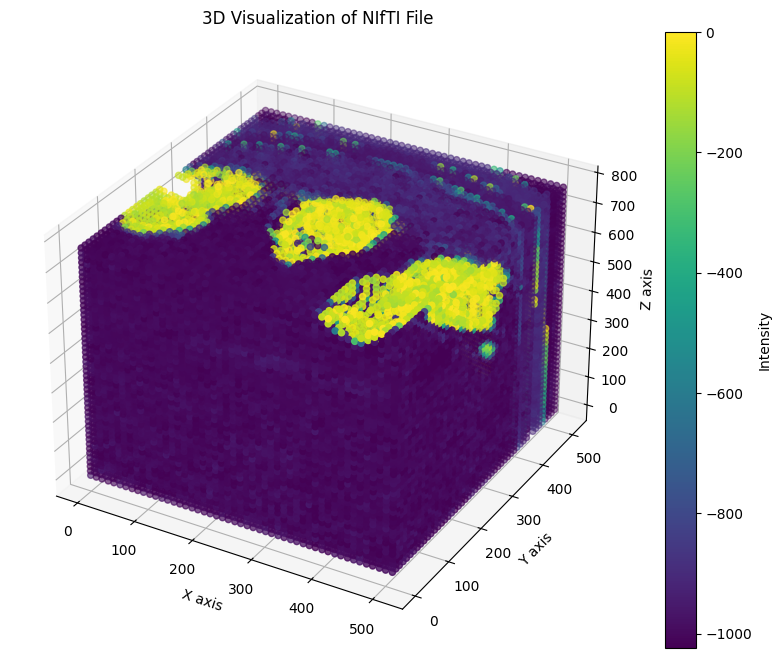

In [19]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the NIfTI file
nii_file = 'AeroPath/1/1_CT_HR.nii.gz'
img = nib.load(nii_file)
data = img.get_fdata()

data[data > 0.8] = np.NaN

# data = np.argwhere(data > 0.)  # Get the indices of non-zero elements

# Check the shape of the data
print(data.shape)

# Downsample the data for visualization
x_indices = np.linspace(0, data.shape[0]-1, 50).astype(int)
y_indices = np.linspace(0, data.shape[1]-1, 50).astype(int)
z_indices = np.linspace(0, data.shape[2]-1, 50).astype(int)

x, y, z = np.meshgrid(x_indices, y_indices, z_indices, indexing='ij')
values = data[x, y, z]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten the arrays for plotting
x = x.flatten()
y = y.flatten()
z = z.flatten()
values = values.flatten()

# Create a scatter plot
sc = ax.scatter(x, y, z, c=values, cmap='viridis', marker='o')

# Add color bar which maps values to colors
cbar = plt.colorbar(sc)
cbar.set_label('Intensity')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Visualization of NIfTI File')

plt.show()


In [10]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.meshgrid(data[], indexing='ij')


ValueError: not enough values to unpack (expected 3, got 1)

In [ ]:
gt_path = 'AeroPath/1/1_CT_HR_label_airways.nii.gz'

gt = nib.load(gt_path).get_fdata()

pred_path = 'predictions_whole/whole_1_prediction.nii.gz'
pred = nib.load(pred_path).get_fdata()


In [ ]:
gt.mean()

In [ ]:
pred[1, :, :, :].mean()

In [ ]:
gt.shape, pred.shape

In [ ]:
pred[1, :, :, :].shape

In [ ]:
volume = np.load('test.npy')

points = np.argwhere(volume > 0)

point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(points)

In [ ]:
volume = np.load(npy_file + '.npy')
volume

In [ ]:
volume = np.load(npy_file)
print("Data max value:", np.max(volume))
print("Data min value:", np.min(volume))

In [ ]:
npy_file = "/home/gasyna/RiSA_S3/3D_segmentation/3D_data_loader/dataset/airways/2_CT_HR_0_0_5.npy"
file = np.load(npy_file)


print(file.min())
print(file.max())
print(file.mean())

fig, ax = plt.subplots()
im = ax.imshow(file[..., 30], cmap="gray")

plt.show()

In [ ]:

file[..., 30]

In [ ]:
file